# Lending Club Analysis

We are working with the Lending Club dataset. Lending club gives out loans based on multiple criteria to their end users. These users are looking for loans for various reasons ranging from debt consolidation to wedding. Lending Club uses about 75 different features to generate, where some of the most prominent features include:

1. Loan grade
2. Previous track record of the lender 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
df = pd.read_csv("loan.csv", low_memory = True)

Let's take a look at the dimensions of the data

In [8]:
df.shape

(887379, 74)

There are 74 columns and about 900k columns. We want to be able to view all the columns at once, so we change the maximum displayable columns to max_columns.

In [9]:
pd.set_option('max_columns', None)

In [10]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Business Problem To Solve

We can try answering a few business problems using this dataset. Let's take a look at some of the questions and see how we can solve them and then prioritize one question for this problem.

1. Identify whether the loan will be paid off or not. The loan_status is a good starting point for this problem.
2. Identify the Annualized Return Rate of the loans based on the available dataset.

We want to answer question #1 since that seems like a fun question to answer. We will do the following to answer that question.

# Approach

This will be our approach:

1. Prepare the dataset for analysis
2. Remove and Replace rows/columns for analysis
3. Prepare the dataset for modeling
4. Modeling

## Step 1: Prepare teh dataset for analysis

Let's look at the loan status column.

In [12]:
pd.value_counts(df.loan_status).to_frame()

,loan_status
Current,601779
Fully Paid,207723
Charged Off,45248
Late (31-120 days),11591
Issued,8460
In Grace Period,6253
Late (16-30 days),2357
Does not meet the credit policy. Status:Fully Paid,1988
Default,1219
Does not meet the credit policy. Status:Charged Off,761


It seems like there are multiple charge offs and paid options. Let's create a new column 'loan_status_clean' and replace the values in the 'loan_status' column with these dummies:

1. 'Fully Paid': 1
2. 'Charged Off' : 0
3. 'Current': 2
4. 'Default' : 0,
5. 'Late (31-120 days)' : 0
6. 'In Grace Period' : 0
7. 'Late (16-30 days)' : 0,
8. 'Does not meet the credit policy. Status:Fully Paid' : 2,
9. 'Does not meet the credit policy. Status:Charged Off' : 2
10. 'Issued': 2

We will drop all the 2's since they are more about current loans and we do not have information whether they have been paid or not.

In [19]:
df['loan_status_clean'] = df.loan_status.map({
                                            'Fully Paid': 1,
                                            'Charged Off' : 0, 
                                            'Current': 2, 
                                            'Default' : 0,
                                            'Late (31-120 days)' : 0, 
                                            'In Grace Period' : 2, 
                                            'Late (16-30 days)' : 0,
                                            'Does not meet the credit policy. Status:Fully Paid' : 2,
                                            'Does not meet the credit policy. Status:Charged Off' : 2, 
                                            'Issued': 2
                                        })

Let's drop all the rows with 2's in the 'loan_status_clean' column since these rows are not providing us with extra information.

In [20]:
df = df[df.loan_status_clean != 2]

In [23]:
pd.value_counts(df.loan_status_clean).to_frame()

,loan_status_clean
1,207723
0,60415


In [21]:
loan_fail = len(df[df.loan_status_clean == 0])
loan_suc = len(df[df.loan_status_clean != 0])
pct_fail = loan_fail / (loan_fail + loan_suc)
pct_suc = 1 - pct_fail
print ("The percentage of successful loans is {0:.2f} %".format((pct_suc * 100)))
print ("The percentage of failed loans is {0:.2f} %".format(pct_fail * 100 ))

The percentage of successful loans is 77.47 %
The percentage of failed loans is 22.53 %


From a training/testing standpoint, even though we have an unbalanced dataset, weshould be good to go since 23% ~60.5k datapoints are available for the failed loans. (But this is a problem which the company would love to have :-))

# Step 2a: EDA 

Let's focus on these aspects in this step:

1. Visualize some data points which may be interesting for our reader.


In [27]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_status_clean
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


The first category we want to tackle is the loan duration. Let's compare the loan duration with the success/failure rates.

Text(0.5, 0, 'Term')

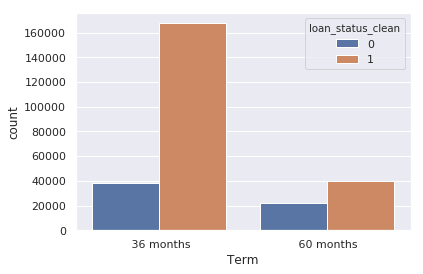

In [30]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'term', hue = 'loan_status_clean', data = df)
ax.set_xlabel('Term')

Just by eyeballing this chart, it seems like there is a good likelihood that if the loan was taker for 60 months, the odds of failure rises up to >50%. Let's compare the grade of the loan with the failure/success rates.

Text(0.5, 0, 'Grade')

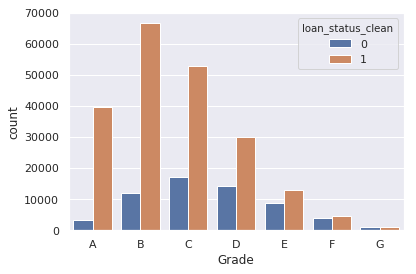

In [38]:
sns.set(style = 'darkgrid')

ax = sns.countplot(x = 'grade', hue = 'loan_status_clean', data = df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
ax.set_xlabel('Grade')

We can see that the loan distribution seems to have a normal distribution around B and is skewed right. Let's compare the employment length and see if we can come up with a conclusion.

In [40]:
df.emp_length.value_counts()

10+ years    81469
2 years      24912
< 1 year     22214
3 years      21607
5 years      18978
1 year       17876
4 years      17090
6 years      15532
7 years      14864
8 years      12585
9 years      10182
Name: emp_length, dtype: int64

In [41]:
df['emp_length_clean'] = df['emp_length'].map({'< 1 year': 0, '1 year': 1, '2 years' : 2, '3 years' : 3, '4 years' : 4, '5 years' : 5, '6 years' : 6, '7 years' : 7, '8 years' : 8, '9 years' : 9, '10+ years' : 10})

Text(0.5, 0, 'Employment Length')

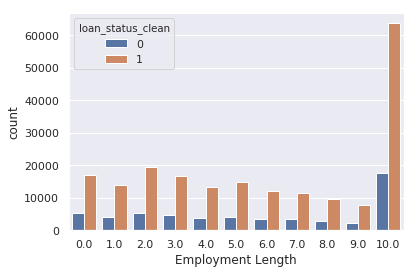

In [43]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'emp_length_clean', hue = 'loan_status_clean', data = df)
ax.set_xlabel('Employment Length')

It's really hard to say anything from this chart. Let's compare home ownership and their loan repayment rates.

Text(0.5, 0, 'Home Ownership')

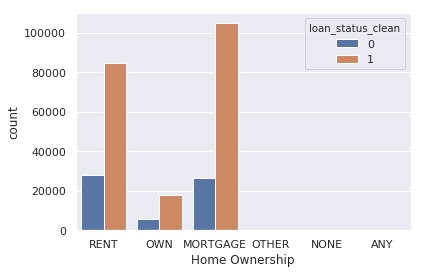

In [44]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'home_ownership', hue = 'loan_status_clean', data = df)
ax.set_xlabel('Home Ownership')

In [48]:
pd.value_counts(df.home_ownership).to_frame()

,home_ownership
MORTGAGE,131462
RENT,112924
OWN,23567
OTHER,141
NONE,43
ANY,1


One could argue that people who have their own houses have a better repayment rate compared to people who do not have their own houses. But again, it seems like a weak indicator. Let's compare the loan verification status with the loan repayment rate.

Text(0.5, 0, 'Verification Status')

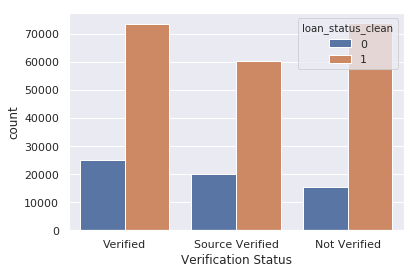

In [51]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'verification_status', hue = 'loan_status_clean', data = df)
ax.set_xlabel('Verification Status')

Looking at this, it seems like the "Not Verified" status have the best return values compared to any other status. Let's compare the purpose with return rates.

[Text(0, 0, 'credit_card'),
 Text(0, 0, 'car'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'other'),
 Text(0, 0, 'wedding'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'medical'),
 Text(0, 0, 'moving'),
 Text(0, 0, 'vacation'),
 Text(0, 0, 'house'),
 Text(0, 0, 'renewable_energy'),
 Text(0, 0, 'educational')]

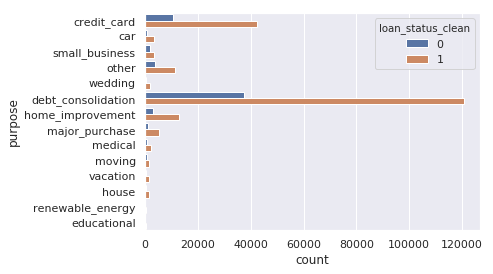

In [70]:
sns.set(style = 'darkgrid')
ax = sns.countplot(y = 'purpose', hue = 'loan_status_clean', data = df)
ax.set_yticklabels(ax.get_yticklabels())

Debt Consolidation followed by credit card seems to be the biggest driver of Lending Club loans. The final categorial column which we want to take a look at is the Application Type. It seems like there are essentially 3 outliers. We will get rid of this column for our case later.

In [63]:
pd.value_counts(df.application_type).to_frame()

,application_type
INDIVIDUAL,268135
JOINT,3


# Step 2b Remove and Replace

We will do the following in this step:

1. Remove columns which are not good features
2. Replace columns that may have insufficient data or are highly correlated with some other columns (multicollinearity)
3. Remove rows which may not be useful for our analysis
4. Replace NaNs

Let's start with getting an idea of the columns in the dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268138 entries, 0 to 887371
Data columns (total 76 columns):
id                             268138 non-null int64
member_id                      268138 non-null int64
loan_amnt                      268138 non-null float64
funded_amnt                    268138 non-null float64
funded_amnt_inv                268138 non-null float64
term                           268138 non-null object
int_rate                       268138 non-null float64
installment                    268138 non-null float64
grade                          268138 non-null object
sub_grade                      268138 non-null object
emp_title                      253177 non-null object
emp_length                     257309 non-null object
home_ownership                 268138 non-null object
annual_inc                     268138 non-null float64
verification_status            268138 non-null object
issue_d                        268138 non-null object
loan_status          

## Removing columns with limited data

There are multiple columns with plenty of null values (>250k/282k). We remove all these columns since it would be difficult to predict what the values would be without having a reasonable idea of ways to replace the dataset for prediction.

In [74]:
df = df.dropna(axis = 1, thresh = 250000, how = 'any')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268138 entries, 0 to 887371
Data columns (total 51 columns):
id                            268138 non-null int64
member_id                     268138 non-null int64
loan_amnt                     268138 non-null float64
funded_amnt                   268138 non-null float64
funded_amnt_inv               268138 non-null float64
term                          268138 non-null object
int_rate                      268138 non-null float64
installment                   268138 non-null float64
grade                         268138 non-null object
sub_grade                     268138 non-null object
emp_title                     253177 non-null object
emp_length                    257309 non-null object
home_ownership                268138 non-null object
annual_inc                    268138 non-null float64
verification_status           268138 non-null object
issue_d                       268138 non-null object
loan_status                   268138 

We dropped 24 columns that had over 250,000 missing values. The pending columns have over 250,000 values which is a good starting point. Let's explore what these columns look like and if need them. If we do, let's figure out what strategies we can effectively employ to improve our dataset + missing values.

1. 'emp_title' - In our anaylysis, we won't be using this column since the information may not be relevent compared to the other data which we have.
2. 'emp_length' - This may be relevent, but for now, let's ignore this column since there are other columns which we can use a proxy (for exmaple, earliest credit line can help us estimate how long the user has had access to credit)
3. 'last_pymnt_d' - We may have to do some exploration to figure out how to supplement this dataset. For now, we will remove the 9k rows associated with those numbers
4. 'last_credit_pull_d' - We can replace it with the mean of the column.
5. 'collections_12_mths_ex_med' - If these are predominantly grade A customers, we will replace the NaNs with 0 since they are expected to have good history.

In [97]:
df = df.drop('emp_title', axis = 1)

In [96]:
df = df.drop('title', axis = 1)

In [78]:
df.dropna(subset=['revol_util'],inplace = True)

In [79]:
df.dropna(subset=['last_credit_pull_d'],inplace = True)

In [83]:
df.dropna(subset=['last_pymnt_d'],inplace = True)

In [94]:
df.dropna(subset=['collections_12_mths_ex_med'],inplace = True)

In [102]:
df.emp_length_clean = df.emp_length_clean.fillna(0)

In [103]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,loan_status_clean,emp_length_clean
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,RENT,24000.0,Verified,n,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,171.62,0.0,1.0,INDIVIDUAL,0.0,1,10.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,n,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,119.66,0.0,1.0,INDIVIDUAL,0.0,0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,n,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,649.91,0.0,1.0,INDIVIDUAL,0.0,1,10.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,RENT,49200.0,Source Verified,n,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,357.48,0.0,1.0,INDIVIDUAL,0.0,1,10.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,RENT,36000.0,Source Verified,n,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,161.03,0.0,1.0,INDIVIDUAL,0.0,1,3.0


1. For our analysis, let's remove all the date time parameters, except for the term value. We want to be able to predict the outcome with minimum parameters
2. Let's remove the recoveries, total_rec_late_fee, and collection_recovery_fee since they are post loan default/charge off events
3. Zip Code and Addr_State since we are not doing any geospatial analysis
4. url
5. grade - this is a very important feature in determing whether a loan is good or not. The loan grade is the result of a formula that takes into account not only credit score, but also a combination of several indicators of credit risk from the credit report and loan application. All loans have either a 36- or 60-month term, with fixed interest rates and equal payments. We keep this and drop the sub_grade column which is granular substitute for the grade.
6. id/member_id : These are identification columns which we do not need.

In [105]:
cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee',\
        'total_rec_late_fee', 'addr_state', 'zip_code',  'url', 'sub_grade', 'id', 'member_id', 'emp_length', 'loan_status']

for col in cols:
    df = df.drop(col, axis = 1)

"cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee',        'total_rec_late_fee', 'addr_state', 'zip_code',  'url', 'sub_grade', 'id', 'member_id', 'emp_length', 'loan_status']\n\nfor col in cols:\n    df = df.drop(col, axis = 1)"

In [106]:
df.shape

(267158, 34)

We have reduced the features to 34 features and 267214 rows.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267158 entries, 0 to 887371
Data columns (total 34 columns):
loan_amnt                     267158 non-null float64
funded_amnt                   267158 non-null float64
funded_amnt_inv               267158 non-null float64
term                          267158 non-null object
int_rate                      267158 non-null float64
installment                   267158 non-null float64
grade                         267158 non-null object
home_ownership                267158 non-null object
annual_inc                    267158 non-null float64
verification_status           267158 non-null object
pymnt_plan                    267158 non-null object
purpose                       267158 non-null object
dti                           267158 non-null float64
delinq_2yrs                   267158 non-null float64
inq_last_6mths                267158 non-null float64
open_acc                      267158 non-null float64
pub_rec                       2

## Step 4: Modeling

We will do the following:

1. Summarize the data
2. Transform the numerical columns
3. One-Hot Encoding for the Categorical Columns
4. Perform:
    a. Logistic Regression
    b. Random Forest
    c. Linear Discriminant Analysis
    d. Quadratic Discriminant Analysis
5. Compare the performances of each of these models

In [109]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,loan_status_clean,emp_length_clean
count,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,2.671580e+05,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,2.671580e+05,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.000000,267158.0,267158.000000,267158.000000,267158.000000
mean,13681.803745,13643.276731,13556.800184,13.883186,421.027124,7.241090e+04,16.727752,0.258297,0.852069,10.993015,0.147699,1.519641e+04,54.555327,25.060882,651.925333,651.683934,13236.504142,13145.129475,11105.013597,1982.082670,6142.863527,0.007393,1.0,0.003406,0.776716,5.596437
std,8164.089629,8143.339289,8160.959300,4.425437,245.440945,5.823212e+04,7.856676,0.758906,1.067514,4.916867,0.445484,1.882903e+04,24.718490,11.762682,3235.489295,3234.301321,9459.046684,9454.759067,8333.491912,2102.184047,7288.714111,0.093557,0.0,0.063431,0.416448,3.731041
min,500.000000,500.000000,0.000000,5.320000,15.690000,3.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,7500.000000,7500.000000,7200.000000,10.990000,243.010000,4.500000e+04,10.880000,0.000000,0.000000,8.000000,0.000000,5.890000e+03,36.600000,16.000000,0.000000,0.000000,6050.975800,5965.262500,4725.000000,641.980000,447.832500,0.000000,1.0,0.000000,1.000000,2.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,367.740000,6.200000e+04,16.380000,0.000000,1.000000,10.000000,0.000000,1.095200e+04,56.000000,23.000000,0.000000,0.000000,11111.061039,11028.440000,9650.000000,1332.975000,3377.105000,0.000000,1.0,0.000000,1.000000,6.000000
75%,18700.000000,18450.000000,18250.000000,16.780000,550.140000,8.700000e+04,22.210000,0.000000,1.000000,14.000000,0.000000,1.908600e+04,74.000000,32.000000,0.000000,0.000000,18129.050819,18017.097500,15600.000000,2525.250000,9597.425000,0.000000,1.0,0.000000,1.000000,10.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1424.570000,8.706582e+06,57.140000,29.000000,8.000000,76.000000,15.000000,1.746716e+06,892.300000,150.000000,35000.000000,35000.000000,57777.579870,57777.580000,35000.030000,22777.580000,36475.590000,6.000000,1.0,5.000000,1.000000,10.000000


Let's standardize the data before we do anything since LogReg relies on standardized data.

X is all the independent variables.
y is loan_status_clean which is our dependent variable. 

In [110]:
X = df.drop(['loan_status_clean'], axis = 1, inplace = False)
y = df.loan_status_clean

We want to transform all the numerical dependent variables columns.

In [111]:
n_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
n_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'emp_length_clean'],
      dtype='object')

In [112]:
from sklearn import preprocessing
X[n_cols] = preprocessing.StandardScaler().fit(X[n_cols]).transform(X[n_cols])
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,emp_length_clean
0,-1.063416,-1.061394,-1.051570,36 months,-0.730593,-1.051811,B,RENT,-0.831345,Verified,n,credit_card,1.390189,-0.340354,0.138576,-1.625635,-0.331548,-0.082236,1.179066,-1.365412,f,-0.201492,-0.201492,-0.779724,-0.773511,-0.732589,-0.533262,-0.819247,-0.079018,0.0,INDIVIDUAL,-0.0537,1.180253
1,-1.369635,-1.368394,-1.354843,60 months,0.313374,-1.471628,C,RENT,-0.728309,Source Verified,n,car,-2.001836,-0.340354,3.885605,-1.625635,-0.331548,-0.717479,-1.826787,-1.790486,f,-0.201492,-0.201492,-1.292711,-1.283633,-1.277805,-0.735861,-0.826376,-0.079018,0.0,INDIVIDUAL,-0.0537,-1.499970
2,-1.381884,-1.380674,-1.367097,36 months,0.469291,-1.371808,C,RENT,-1.033090,Not Verified,n,small_business,-1.019231,-0.340354,1.075333,-1.829017,-0.331548,-0.650083,1.777809,-1.280398,f,-0.201492,-0.201492,-1.081808,-1.072634,-1.044584,-0.655716,-0.753626,-0.079018,0.0,INDIVIDUAL,-0.0537,1.180253
3,-0.450976,-0.447394,-0.435832,36 months,-0.088847,-0.332941,C,RENT,-0.398593,Source Verified,n,other,0.416493,-0.340354,0.138576,-0.201961,-0.331548,-0.509768,-1.357502,1.015002,f,-0.201492,-0.201492,-0.106798,-0.097182,-0.132599,0.108101,-0.793747,-0.079018,0.0,INDIVIDUAL,-0.0537,1.180253
5,-1.063416,-1.061394,-1.048506,36 months,-1.352001,-1.077928,A,RENT,-0.625273,Source Verified,n,wedding,-0.703575,-0.340354,2.012090,-0.405343,-0.331548,-0.384164,-1.062176,-1.110368,f,-0.201492,-0.201492,-0.804007,-0.794707,-0.732589,-0.642525,-0.820700,-0.079018,0.0,INDIVIDUAL,-0.0537,-0.695903


Looks pretty sweet. Let's proceed to tackling the categorical columns.

In [113]:
X = pd.get_dummies(X,drop_first=True)

In [114]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,emp_length_clean,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_JOINT
0,-1.063416,-1.061394,-1.051570,-0.730593,-1.051811,-0.831345,1.390189,-0.340354,0.138576,-1.625635,-0.331548,-0.082236,1.179066,-1.365412,-0.201492,-0.201492,-0.779724,-0.773511,-0.732589,-0.533262,-0.819247,-0.079018,0.0,-0.0537,1.180253,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.369635,-1.368394,-1.354843,0.313374,-1.471628,-0.728309,-2.001836,-0.340354,3.885605,-1.625635,-0.331548,-0.717479,-1.826787,-1.790486,-0.201492,-0.201492,-1.292711,-1.283633,-1.277805,-0.735861,-0.826376,-0.079018,0.0,-0.0537,-1.499970,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.381884,-1.380674,-1.367097,0.469291,-1.371808,-1.033090,-1.019231,-0.340354,1.075333,-1.829017,-0.331548,-0.650083,1.777809,-1.280398,-0.201492,-0.201492,-1.081808,-1.072634,-1.044584,-0.655716,-0.753626,-0.079018,0.0,-0.0537,1.180253,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,-0.450976,-0.447394,-0.435832,-0.088847,-0.332941,-0.398593,0.416493,-0.340354,0.138576,-0.201961,-0.331548,-0.509768,-1.357502,1.015002,-0.201492,-0.201492,-0.106798,-0.097182,-0.132599,0.108101,-0.793747,-0.079018,0.0,-0.0537,1.180253,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,-1.063416,-1.061394,-1.048506,-1.352001,-1.077928,-0.625273,-0.703575,-0.340354,2.012090,-0.405343,-0.331548,-0.384164,-1.062176,-1.110368,-0.201492,-0.201492,-0.804007,-0.794707,-0.732589,-0.642525,-0.820700,-0.079018,0.0,-0.0537,-0.695903,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
X.shape

(267158, 55)

We have about 55 features which is a decent feature set size from our original dataset. Let's split the dataset and then move to modeling

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)

### Logisitic Regression

Let's start with stronger regularization. If our performance is poor, we can explore other values.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 0])

In [119]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.987367120826471

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[41551    71]
 [  604 11206]]


Confusion matrix, without normalization
[[41551    71]
 [  604 11206]]


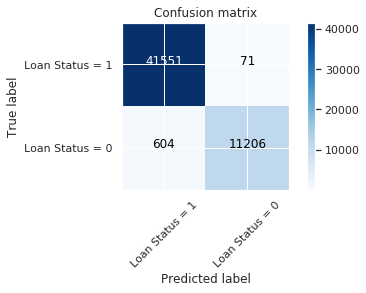

In [124]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Loan Status = 1','Loan Status = 0'],normalize= False,  title='Confusion matrix')

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     11810
           1       0.99      1.00      0.99     41622

   micro avg       0.99      0.99      0.99     53432
   macro avg       0.99      0.97      0.98     53432
weighted avg       0.99      0.99      0.99     53432



We do fairly well as a baseline. Let's see if we can beat these numbers with Random Forest.

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_split=0.01)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

In [132]:
print('\nTrain Results:', rf.score(X_train, y_train))
print('\nTest Results:', rf.score(X_test, y_test))


Train Results: 0.9525685816062255

Test Results: 0.950604081231368


Let's do some hyperparameter tuning by doing a randomsearch for the RF. 

In [134]:
#From: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
